# **Ex3 - Unsupervised learning**

## Names and IDs

1.   Rom Amsili - 316509397
2.   Matan Leventer - 208447029


In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn.metrics as sm

# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [3]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes
 63% 26.0M/41.0M [00:00<00:00, 108MB/s] 
100% 41.0M/41.0M [00:00<00:00, 136MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [4]:
# Implement here
# Example for reading one file. It will work if the previous step was successful.
fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')

In [5]:
#Insert column for True/fake
true_df['label'] = 1
fake_df['label'] = 0

In [6]:
join_df = pd.concat([true_df , fake_df])
join_df = join_df.reset_index()
join_df  = join_df.drop(columns=["index","title","subject","date"])
real_label=np.array(join_df['label'])

## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`).
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [7]:
vectorizer = TfidfVectorizer(max_features=1000,stop_words="english")
X = vectorizer.fit_transform(join_df['text'].to_list())
scaler = StandardScaler().fit(X.toarray())

In [8]:
X_scaled = scaler.transform(X.toarray())
kmeans = KMeans(n_clusters=2)
clustered = kmeans.fit_predict(X_scaled)

## 3. Visualize using scatter plot (20 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction suing PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.

In [9]:
#PCA
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
D_2 = pca_2.fit_transform(np.concatenate((X_scaled, kmeans.cluster_centers_), axis = 0))
D_3 = pca_3.fit_transform(np.concatenate((X_scaled, kmeans.cluster_centers_), axis = 0))


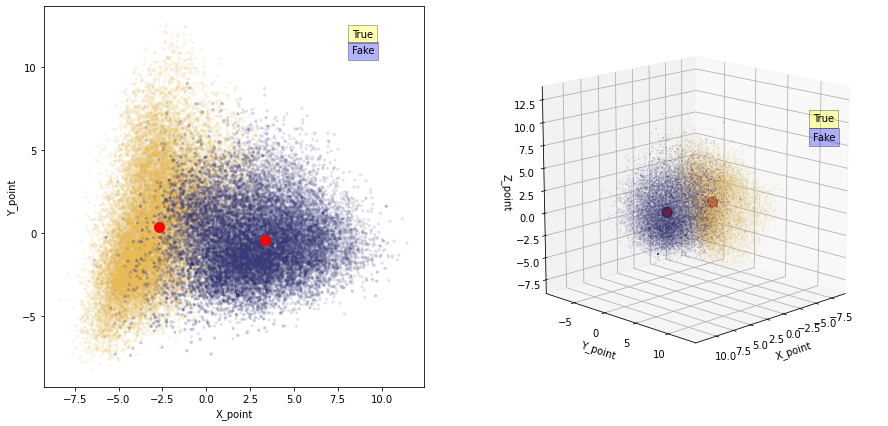

In [10]:
colors = cm.tab20b(real_label.astype(float) / 2)
fig = plt.figure(figsize=(15,7))

# PLOT 2D
ax= fig.add_subplot(1,2,1)
ax.scatter(D_2[:44898,0],D_2[:44898,1] ,s=20,c=colors,marker='.', alpha=0.1)
ax.scatter(D_2[44898:44900,0],D_2[44898:44900,1] ,color='red',marker='o',alpha=1,s=100)
plt.xlabel("X_point")
plt.ylabel("Y_point")
ax.text(8.3, 11.8, 'True', fontsize =10, 
         bbox = dict(facecolor = 'yellow', alpha = 0.3))
ax.text(8.3, 10.8, 'Fake', fontsize =10, 
         bbox = dict(facecolor = 'blue', alpha = 0.3))

# PLOT 3D
ax=fig.add_subplot(1,2,2,projection ='3d')
ax.view_init(15,45)
ax.scatter(D_3[:44898,0],D_3[:44898,1],D_3[:44898,2] ,s=1,marker='.',c=colors,alpha=0.1)
ax.scatter(D_3[44898:44900,0],D_3[44898:44900,1],D_3[44898:44900,2] ,alpha=1,color='red',marker='o',s=100,edgecolor='k')
ax.text(-7.5,11,10, size=10,s='True' ,zorder=1,  bbox = dict(facecolor = 'yellow', alpha = 0.3)) 
ax.text(-7.5,11,8, size=10,s='Fake' ,zorder=1,  bbox = dict(facecolor = 'blue', alpha = 0.3)) 

ax.set_xlabel('X_point', fontsize=10, rotation=150)
ax.set_ylabel('Y_point')
ax.set_zlabel('Z_point', fontsize=10, rotation=60)


plt.show()


## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [11]:
join_df['predicted_label']=kmeans.labels_
acc_1 = sum(join_df['label']==join_df['predicted_label'])/len(join_df)
print('Cluster 1 as fake and cluster 2 as real : ',acc_1)
acc_2 = sum(join_df['label']!=join_df['predicted_label'])/len(join_df)
print('Cluster 1 as true and cluster 2 as fake : ',acc_2)

Cluster 1 as fake and cluster 2 as real :  0.8713305715176622
Cluster 1 as true and cluster 2 as fake :  0.12866942848233776


## 5. Find optimal `k` (20 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.

In [12]:
inertia=[]
silhouette=[]
for k in range(2,21):
  kmeans = KMeans(n_clusters=k, max_iter=300, random_state=10)
  cluster_labels = kmeans.fit_predict(X_scaled)
  inertia.append(kmeans.inertia_)
  silhouette_avg = sm.silhouette_score(X_scaled, cluster_labels,sample_size=300, metric='euclidean')
  silhouette.append(silhouette_avg)

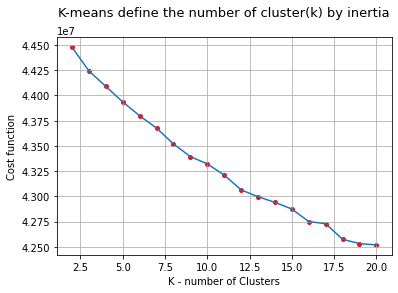

In [13]:
# SSD
x = [i for i in range(2,21)]
y = inertia
plt.plot(x,inertia)
plt.scatter(x,y,s=15,color='red')
plt.xlabel("K - number of Clusters")
plt.ylabel("Cost function")
plt.title("K-means define the number of cluster(k) by inertia\n",size=13)
plt.grid()
plt.show()

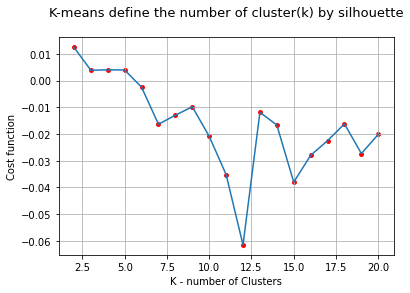

In [14]:
# silhouette
x = [i for i in range(2,21)]
y = silhouette
plt.plot(x,silhouette)
plt.scatter(x,y,s=15,color='red')
plt.xlabel("K - number of Clusters")
plt.ylabel("Cost function")
plt.title("K-means define the number of cluster(k) by silhouette\n",size=13)
plt.grid()
plt.show()

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

**The optimal K is 2, as expected.**  

We found the optimal K from the graphs above:

From *'K-means define the number of cluster(k) by inertia'* graph the result aren't obvious.

But from *'K-means define the number of cluster(k) by silhouette'* graph, the best result was when K = 2, which make sense because the model gets two types of text - True and Fake news.


---



# 7. PCA then k-means (15 points)
This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.


In [15]:
#PCA
pca_1000 = PCA()
D_1000 = pca_1000.fit_transform(X_scaled)
D_2 = D_1000[:,:2]
D_3 = D_1000[:,:3]


In [16]:
#Kmeans
kmeans = KMeans(n_clusters=2)
clustered = kmeans.fit_predict(D_1000)

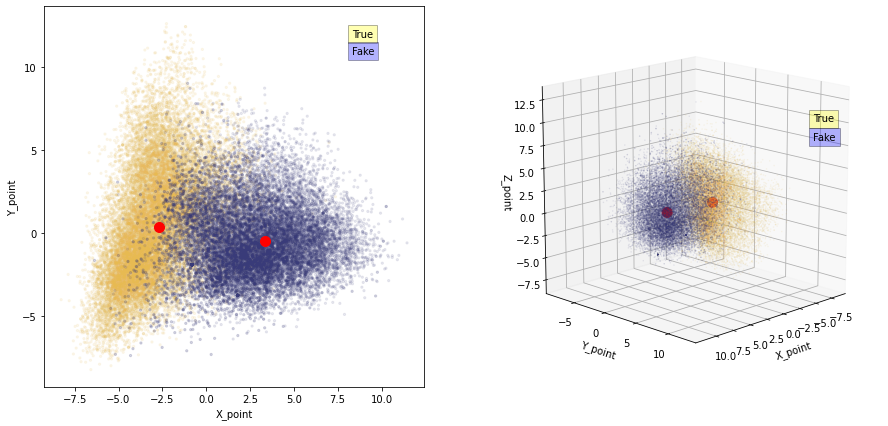

In [17]:
colors = cm.tab20b(real_label.astype(float) / 2)
fig = plt.figure(figsize=(15,7))

# PLOT 2D
ax= fig.add_subplot(1,2,1)
ax.scatter(D_2[:,0],D_2[:,1] ,s=20,c=colors,marker='.', alpha=0.1)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,color='red',marker='o',alpha=1,s=100)
plt.xlabel("X_point")
plt.ylabel("Y_point")
ax.text(8.3, 11.8, 'True', fontsize =10, 
         bbox = dict(facecolor = 'yellow', alpha = 0.3))
ax.text(8.3, 10.8, 'Fake', fontsize =10, 
         bbox = dict(facecolor = 'blue', alpha = 0.3))

# PLOT 3D
ax=fig.add_subplot(1,2,2,projection ='3d')
ax.view_init(15,45)
ax.scatter(D_3[:,0],D_3[:,1],D_3[:,2] ,s=1,marker='.',c=colors,alpha=0.1)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],alpha=1,color='red',marker='o',s=100)
ax.text(-7.5,11,10, size=10,s='True' ,zorder=1,  bbox = dict(facecolor = 'yellow', alpha = 0.3)) 
ax.text(-7.5,11,8, size=10,s='Fake' ,zorder=1,  bbox = dict(facecolor = 'blue', alpha = 0.3)) 

ax.set_xlabel('X_point', fontsize=10, rotation=150)
ax.set_ylabel('Y_point')
ax.set_zlabel('Z_point', fontsize=10, rotation=60)

plt.show()

In [18]:
#accuracy
join_df['predicted_label']=kmeans.labels_
acc_1 = sum(join_df['label']==join_df['predicted_label'])/len(join_df)
print('Cluster 1 as fake and cluster 2 as real : ',acc_1)
acc_2 = sum(join_df['label']!=join_df['predicted_label'])/len(join_df)
print('Cluster 1 as true and cluster 2 as fake : ',acc_2)

Cluster 1 as fake and cluster 2 as real :  0.871954207314357
Cluster 1 as true and cluster 2 as fake :  0.128045792685643


##Answer
When we activated PCA first, without limiting his number of component, the result remain the same.

PCA, which performs dimention lowering, choose the minimum value between number of rows and number of column(features). in our case - the minimum is number of features - 1000, which keeps the data base the same as in the first part of the assignment.

# Bonus (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10?
2. What is the optimal k?
3. How do the results changes if you first run PCA?

In [19]:
from keras.datasets import mnist

In [20]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [21]:
# union train and test
X_minst=np.concatenate((train_X, test_X), axis=0)
Y_minst=np.concatenate((train_y, test_y), axis=0)

In [22]:
# X_minst_data reshape
X_minst_data = X_minst.reshape(X_minst.shape[0],X_minst.shape[1]*X_minst.shape[1])

In [23]:
#kmeans
kmeans = KMeans(n_clusters=10)
clustered = kmeans.fit(X_minst_data)

In [24]:
#PCA
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
D_2 = pca_2.fit_transform(np.concatenate((X_minst_data, kmeans.cluster_centers_), axis = 0))
D_3 = pca_3.fit_transform(np.concatenate((X_minst_data, kmeans.cluster_centers_), axis = 0))

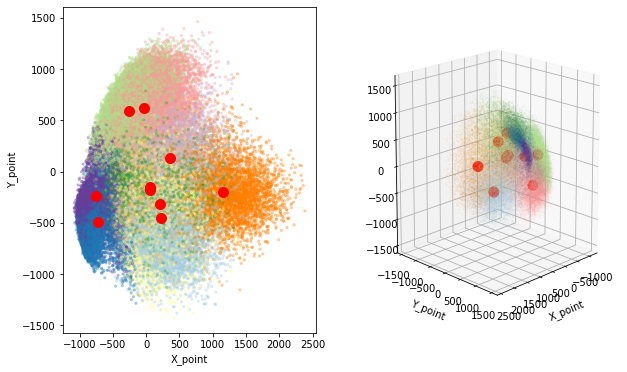

In [25]:
colors = cm.Paired(kmeans.labels_.astype(float) / 10)
fig = plt.figure(figsize=(10,6))

# PLOT 2D
ax= fig.add_subplot(1,2,1)
ax.scatter(D_2[:70000,0],D_2[:70000,1] ,s=20,c=colors,marker='.', alpha=0.3)
ax.scatter(D_2[70000:70010,0],D_2[70000:70010,1],color='red',marker='o',alpha=1,s=100)
plt.xlabel("X_point")
plt.ylabel("Y_point")

# PLOT 3D
ax=fig.add_subplot(1,2,2,projection ='3d')
ax.view_init(15,45)
ax.scatter(D_3[:70000,0],D_3[:70000,1],D_3[:70000,2] ,s=1,marker='.',c=colors,alpha=0.07)
ax.scatter(D_3[70000:70010,0],D_3[70000:70010,1],D_3[70000:70010,2],alpha=1,color='red',marker='o',s=100)
plt.xlabel("X_point")
plt.ylabel("Y_point")

plt.show()

*Your answers here*

In [26]:
def clust_stats(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)

In [27]:
def clusters_purity(clusters_stats):
    majority_sum  = clusters_stats[:,0].sum()
    n = clusters_stats[:,1].sum()
    return majority_sum / n

In [28]:
def clusters_stats(predict, y):
    stats = np.zeros((10,3))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i,:] = clust_stats(cluster)
    return stats

In [29]:
def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(label)

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=n/25+1
    n_cols=25
    plt.figure(figsize=(n_cols * 0.9, n_rows * 1.3))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])
        
def plot_clusters(predict, y, stats):
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, cluster size %d, majority %d " % (stats[i,2], stats[i,1], stats[i,0])
        plot_ds(X_minst[indices][:25], title, y[indices])

Plotting an extract of the 10 clusters, overall purity: 0.579786


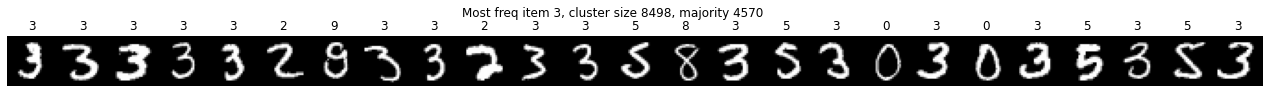

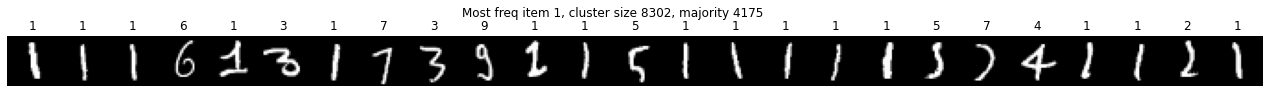

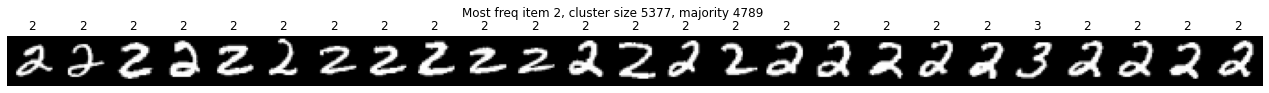

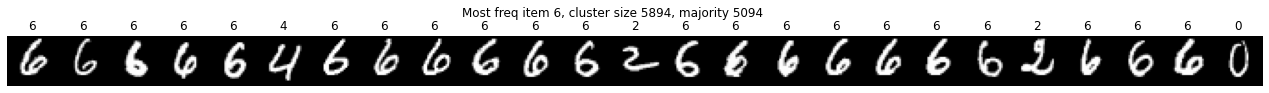

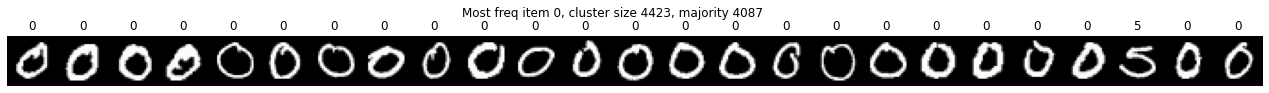

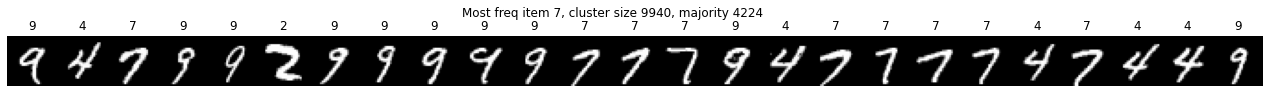

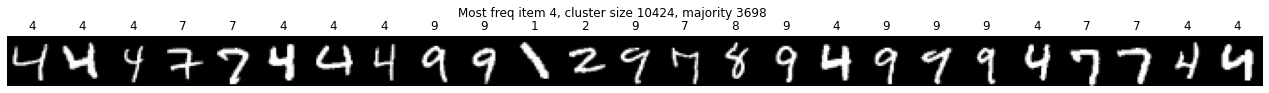

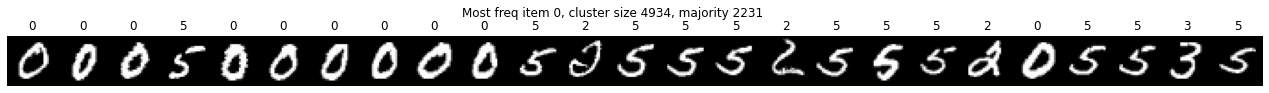

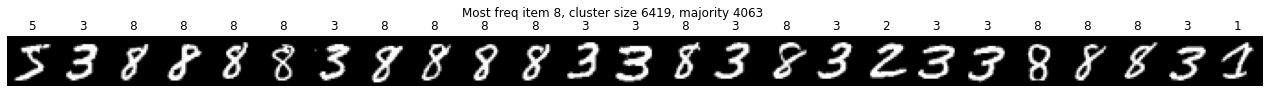

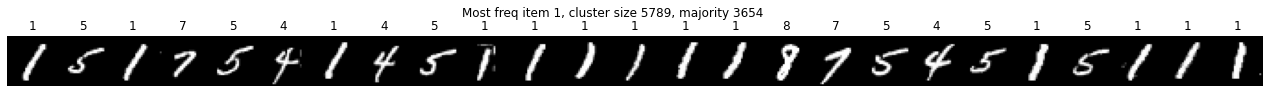

In [37]:
stats = clusters_stats(kmeans.labels_, Y_minst)
purity = clusters_purity(stats)
print("Plotting an extract of the 10 clusters, overall purity: %f" % purity)
plot_clusters(kmeans.labels_, Y_minst, stats)

**We can see that Accuracy = 0.585029**


---



In [31]:
#Optimal K
list_k=[2,4,8,16,32,64]
inertia=[]
for k in list_k:
  kmeans = KMeans(n_clusters=k,max_iter=300, random_state=0)
  cluster_labels = kmeans.fit_predict(X_minst_data)
  inertia.append(kmeans.inertia_)

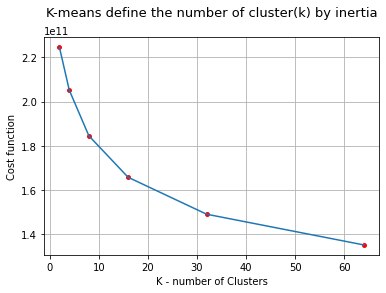

In [32]:
# SSD
x = list_k
y = inertia
plt.plot(list_k,inertia)
plt.scatter(x,y,s=15,color='red')
plt.xlabel("K - number of Clusters")
plt.ylabel("Cost function")
plt.title("K-means define the number of cluster(k) by inertia\n",size=13)
plt.grid()
plt.show()

from *K-means define the number of cluster(k) by inertia* graph the 'elbow' is when **K=15** - which is the optimal K for this database.


---



Now we will do PCA First, and then Kmeans:




In [33]:
#PCA
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_15 = PCA(n_components = 15)
D_15 = pca_15.fit_transform(X_minst_data)
D_2=D_15[:,:2]
D_3=D_15[:,:3]

In [34]:
#Kmeans
kmeans = KMeans(n_clusters=10)
clustered = kmeans.fit_predict(D_15)

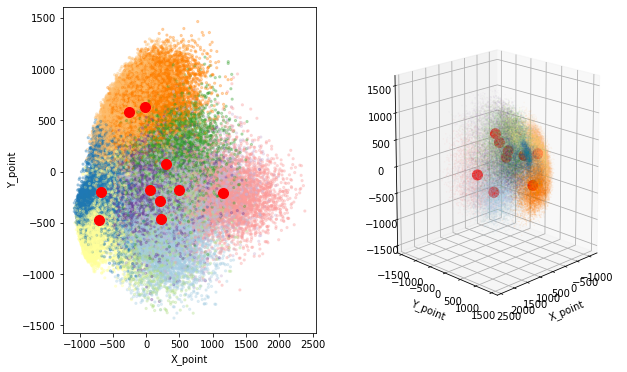

In [35]:
colors = cm.Paired(clustered.astype(float) / 10)

fig = plt.figure(figsize=(10,6))

# PLOT 2D
ax= fig.add_subplot(1,2,1)
ax.scatter(D_2[:,0],D_2[:,1] ,s=20,c=colors,marker='.', alpha=0.3)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='o',alpha=1,s=100)
plt.xlabel("X_point")
plt.ylabel("Y_point")

# PLOT 3D
ax=fig.add_subplot(1,2,2,projection ='3d')
ax.view_init(15,45)
ax.scatter(D_3[:,0],D_3[:,1],D_3[:,2] ,s=1,marker='.',c=colors,alpha=0.07)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],alpha=1,color='red',marker='o',s=100)
plt.xlabel("X_point")
plt.ylabel("Y_point")

plt.show()

Plotting an extract of the 10 clusters, overall purity: 0.579786


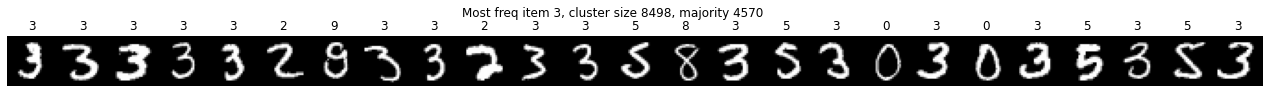

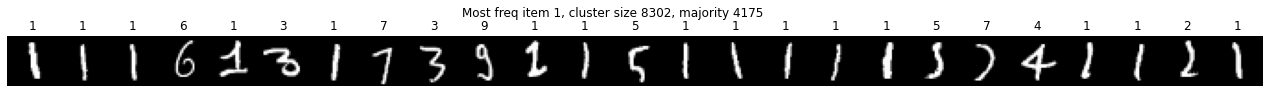

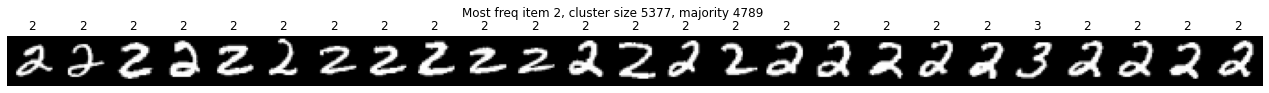

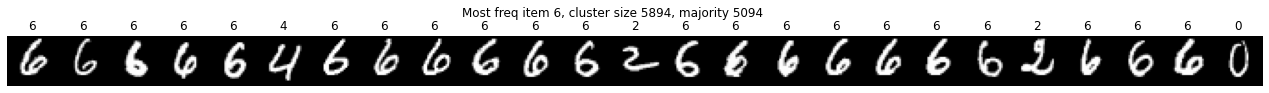

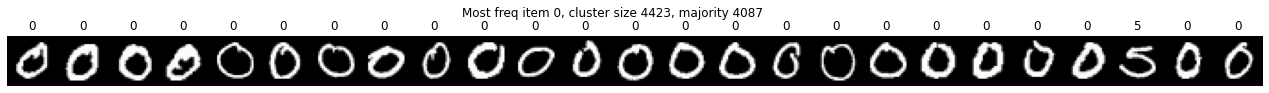

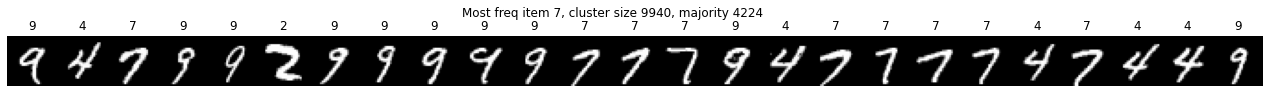

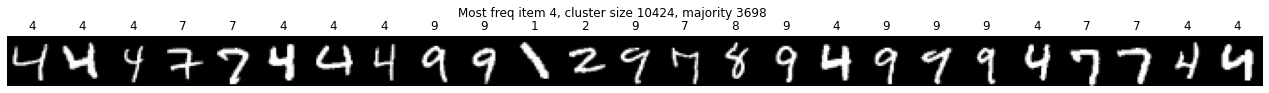

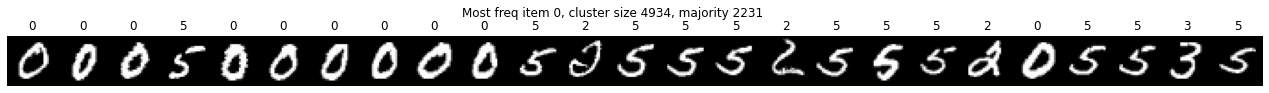

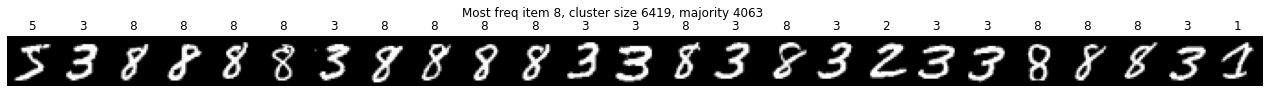

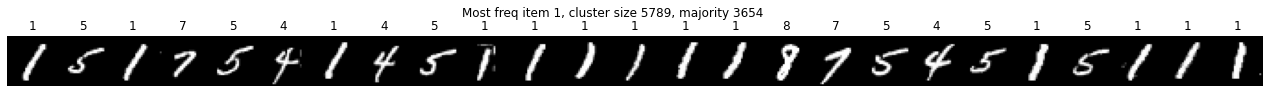

In [36]:
stats = clusters_stats(clustered, Y_minst)
purity = clusters_purity(stats)
print("Plotting an extract of the 10 clusters, overall purity: %f" % purity)
plot_clusters(kmeans.labels_, Y_minst, stats)